<img src="../images/aeropython_logo.png" alt="AeroPython" style="width: 300px;" />

# NumPy: Entrada/Salida

Con E/S (I/O en inglés) entendemos leer y escribir datos archivos. Es algo que necesitaremos hacer con relativa frecuencia, y en NumPy es muy sencillo de hacer. Para el caso de la **lectura** se usa la función `np.loadtxt`.

## Ejemplo datos calidad del aire 

In [1]:
from IPython.display import HTML
HTML('<iframe src="http://ccaa.elpais.com/ccaa/2015/12/24/madrid/1450960217_181674.html" width="700" height="400"></iframe>')

In [2]:
from IPython.display import HTML
HTML('<iframe src="http://www.mambiente.munimadrid.es/sica/scripts/index.php" \
            width="700" height="400"></iframe>')

In [ ]:
# aeropython: preserve
# Linux command 
#!head ../data/barrio_del_pilar-20160322.csv

# Windows
!type ..\data\barrio_del_pilar-20160322.csv

Primero, importamos las librerías que vamos a usar: Numpy y Matplotlib. También usaremos `plt.ion()` para activar el modo interactivo de matplotlib.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
plt.ion()

### Cargando los datos

Usaremos la función `loadtxt` para cargar los datos en un array. Usaremos los argumentos opcionales `skiprows`, `delimiter` y `usecols` para captar los datos que queremos.

In [6]:
# loading the data:
# ./data/barrio_del_pilar-20160322.csv
data1 = np.loadtxt('../data/barrio_del_pilar-20160322.csv', skiprows=3, delimiter=';', usecols=(2,3,4))
data1[:10,:]

array([[ 0.2, 14. , 73. ],
       [ 0.2, 10. , 77. ],
       [ 0.2,  9. , 75. ],
       [ 0.2,  3. , 81. ],
       [ 0.2,  3. , 81. ],
       [ 0.2,  6. , 79. ],
       [ 0.2, 24. , 59. ],
       [ 0.3, 48. , 37. ],
       [ 0.3, 40. , 43. ],
       [ 0.3, 41. , 44. ]])

### Valores inexistentes

El archivo que contiene los datos de 2015 tiene algunos agujeros por errores de medida. Como alternativa a `loadtxt`, podremos usar la función `genfromtxt`, teniendo cuidado de que el ella el argumento opcional de saltar líneas pasa a llamarse `skip_header`.

In [7]:
#Loading the data 2:
#../data/barrio_del_pilar-20151222.csv
data2 = np.genfromtxt('../data/barrio_del_pilar-20151222.csv', skip_header=3, delimiter=';', usecols=(2,3,4))
data2[:10,:]

array([[ 0.5, 65. ,  7. ],
       [ 0.4, 50. ,  7. ],
       [ 0.3, 37. , 11. ],
       [ 0.3, 37. , 10. ],
       [ 0.3, 29. , 17. ],
       [ 0.3, 36. , 13. ],
       [ 0.3, 47. ,  7. ],
       [ 0.4, 57. ,  6. ],
       [ 0.5, 67. ,  6. ],
       [ 0.5, 69. ,  8. ]])

Podemos comprobar como afecta la existencia de estos valores a algunas funciones de Numpy, como `np.mean`. A veces es posible esquivar estos problemas con otras funciones como `np.nanmean`.

In [8]:
np.mean(data2, axis=0)

array([nan, nan, nan])

In [9]:
np.nanmean(data2, axis=0)

array([ 0.64179894, 67.57671958, 17.3       ])

Probemos a calcular la diferencia entre ambos años:

In [10]:
data_dif = data1 - data2
data_dif[:10,:]

array([[ -0.3, -51. ,  66. ],
       [ -0.2, -40. ,  70. ],
       [ -0.1, -28. ,  64. ],
       [ -0.1, -34. ,  71. ],
       [ -0.1, -26. ,  64. ],
       [ -0.1, -30. ,  66. ],
       [ -0.1, -23. ,  52. ],
       [ -0.1,  -9. ,  31. ],
       [ -0.2, -27. ,  37. ],
       [ -0.2, -28. ,  36. ]])

### Guardar los datos nuevos

Supongamos que ahora queremos guardar nuestra tabla de datos en un archivo txt, para poder cargarlo ya modificado más adelante. Una manera fácil de hacerlo sería con otra función de NumPy: `np.savetxt`. Lo usaremos con los argumentos opcionales `fmt='%9.3f', newline = '\r\n'` para obtener un fichero bonito que podamos entender de un vistazo.

In [11]:
np.savetxt('diferencia_interanual.txt', data_dif, fmt='%9.3f', newline = '\r\n')

### Pintando los datos

**Valores máximos ** obtenidos de: http://www.mambiente.munimadrid.es/opencms/export/sites/default/calaire/Anexos/valores_limite_1.pdf

* NO2
    - Media anual: 40 µg/m3
    - **Media horaria: 200 µg/m3 **

(0, 220)

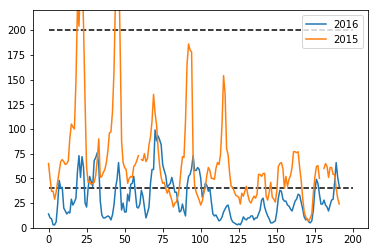

In [12]:
plt.plot(data1[:, 1], label='2016')
plt.plot(data2[:, 1], label='2015')

plt.legend()

plt.hlines(200, 0, 200, linestyles='--')
plt.hlines(40, 0, 200, linestyles='--')
plt.ylim(0, 220)

* CO 
    - **Máxima diaria de las medias móviles octohorarias: 10 mg/m³**

In [13]:
# aeropython: preserve
# http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.convolve.html
def moving_average(x, N=8):
    return np.convolve(x, np.ones(N)/N, mode='same')

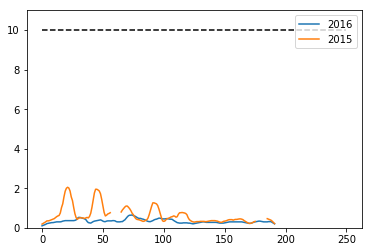

In [14]:
plt.plot(moving_average(data1[:, 0]), label='2016')

plt.plot(moving_average(data2[:, 0]), label='2015')

plt.hlines(10, 0, 250, linestyles='--')
plt.ylim(0, 11)

plt.legend()

* O3
    - **Máxima diaria de las medias móviles octohorarias: 120 µg/m3**
    - Umbral de información. 180 µg/m3
    - Media horaria. Umbral de alerta. 240 µg/m3

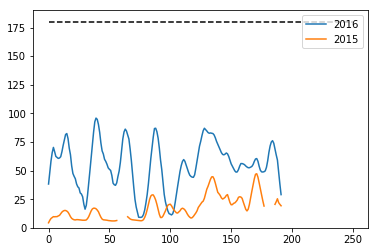

In [15]:
plt.plot(moving_average(data1[:, 2]), label='2016')
#plt.plot(data1[:, 2])

plt.plot(moving_average(data2[:, 2]), label='2015')
#plt.plot(data2[:, 2])

plt.hlines(180, 0, 250, linestyles='--')
plt.ylim(0, 190)

plt.legend()

## ¿Cómo leeríamos un archivo sin usar NumPy?

In [16]:
data_file = '../data/barrio_del_pilar-20151222.csv'

In [ ]:
data = []

with open(data_file) as f:
    # Saltamos las tres primeras líneas
    for ii in range(3):
        f.readline()
    
    for line in f:
        line_string = line
        line_list = line.split(';')
        
        date = line_list[0]
        hour = line_list[1]
        
        components_data = []
        for c in line_list[2:]:
            if '-' not in c:
                components_data.append(float(c))
            else:
                components_data.append(np.nan)
        data.append(components_data)
        
print(np.array(data))    

---

_Ya hemos aprendido a efectuar algunas operaciones útiles con NumPy e incluso hemos hecho nuestro primer ejercicio de lectura de datos. Estamos en condiciones de empezar a escribir programas más interesantes, pero aún queda lo mejor._

Si quieres saber más sobre lectura y escritura de ficheros en Python, puedes consultar al documentación oficial:

https://docs.python.org/3.6/tutorial/inputoutput.html#reading-and-writing-files

---

#### <h4 align="right">¡Síguenos en Twitter!
<br/>
<a href="https://twitter.com/AeroPython" class="twitter-follow-button" data-show-count="false">Follow @AeroPython</a> <script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script> 

Este notebook ha sido realizado por: Juan Luis Cano y Álex Sáez 
 
<a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es"><img alt="Licencia Creative Commons" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Curso AeroPython</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Juan Luis Cano Rodriguez y Alejandro Sáez Mollejo</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es">Licencia Creative Commons Atribución 4.0 Internacional</a>.

---
_Las siguientes celdas contienen configuración del Notebook_

_Para visualizar y utlizar los enlaces a Twitter el notebook debe ejecutarse como [seguro](http://ipython.org/ipython-doc/dev/notebook/security.html)_

    File > Trusted Notebook

In [18]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../styles/aeropython.css'
HTML(open(css_file, "r").read())